## Advanced Lane Finding Project

The goals / steps of this project are the following:

* Compute the camera calibration matrix and distortion coefficients given a set of chessboard images.
* Apply a distortion correction to raw images.
* Use color transforms, gradients, etc., to create a thresholded binary image.
* Apply a perspective transform to rectify binary image ("birds-eye view").
* Detect lane pixels and fit to find the lane boundary.
* Determine the curvature of the lane and vehicle position with respect to center.
* Warp the detected lane boundaries back onto the original image.
* Output visual display of the lane boundaries and numerical estimation of lane curvature and vehicle position.

---

## Compute the camera calibration matrix and distortion coefficients given a set of chessboard images.

In [23]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
%matplotlib inline

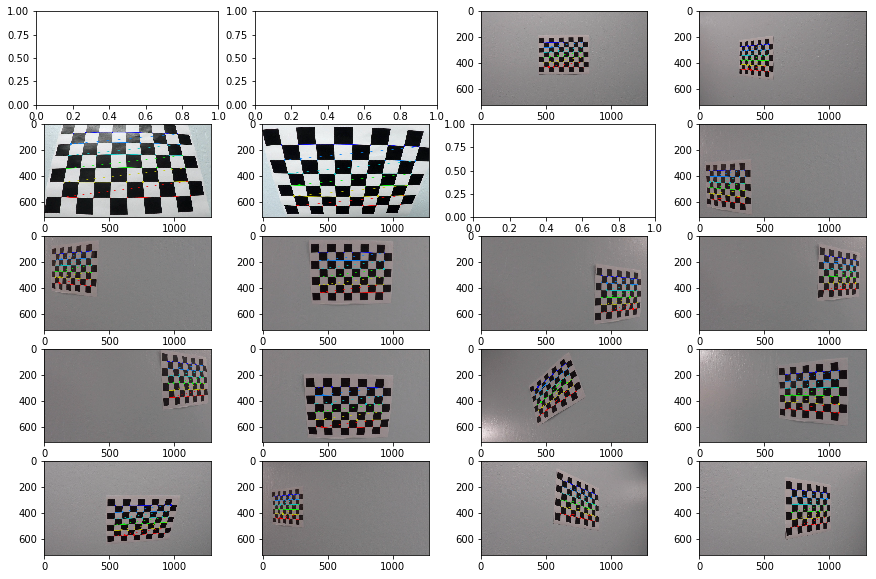

In [31]:


# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((6*9,3), np.float32)
objp[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d points in real world space
imgpoints = [] # 2d points in image plane.

# Make a list of calibration images
images = glob.glob('./camera_cal/calibration*.jpg')

# Set matplotlib parameters
# revel: 
f, ax = plt.subplots(5, 4, figsize=(15, 10))
ax = ax.ravel()

# Step through the list and search for chessboard corners
for i, fname in enumerate(images):
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (9,6),None)

    # If found, add object points, image points
    if ret == True:
        objpoints.append(objp)
        imgpoints.append(corners)
        img = cv2.drawChessboardCorners(img, (9,6), corners, ret)
        # Draw and display the corners
        img = Image.fromarray(img, 'RGB')
        ax[i].imshow(img)
        #print('DONE')
    #else:
        #print('ERROR')

In [25]:
# numpy.ravel() method
test_1 = np.array([[1, 2 ], [3, 4, 5]])
print('array')
print(test_1)
print('success rabeled')
print(np.ravel(test_1))

test_2 = np.array([[1, 2, 6], [3, 4, 5]])
print('array')
print(test_2)
print('success rabeled')
print(np.ravel(test_2))

array
[list([1, 2]) list([3, 4, 5])]
success rabeled
[list([1, 2]) list([3, 4, 5])]
array
[[1 2 6]
 [3 4 5]]
success rabeled
[1 2 6 3 4 5]


## Apply a distortion correction to raw images.

"\n\ndef correct_unwrap(img, nx, ny, mtx, dist):\n    undist = cv2.undistort(img, mtx, dist, None, mtx)\n    gray = cv2.cvtColor(undist, cv2.COLOR_RGB2GRAY)\n\n    \n    \n# Display images\nf, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))\nf.tight_layout()\nax1.imshow(img)\nax1.set_title('Original Image', fontsize=50)\nax2.imshow(top_down)\nax2.set_title('Undistorted and Warped Image', fontsize=50)\nplt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)\n"

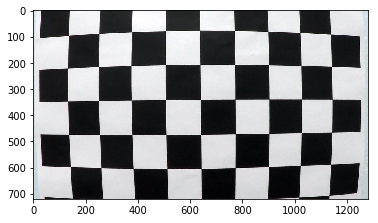

In [34]:
img = cv2.imread('camera_cal/calibration1.jpg')
plt.imshow(img)

def correct_unwrap(img, nx, ny, mtx, dist):
    undist = cv2.undistort(img, mtx, dist, None, mtx)
    gray = cv2.cvtColor(undist, cv2.COLOR_RGB2GRAY)

    
    
# Display images
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(top_down)
ax2.set_title('Undistorted Image', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
